In [1]:
import numpy as np
import cv2
import pandas as pd
from matplotlib import pyplot as plt

from utils import *

# Correlation matrix

🦠 LOAD tables/features_ScoreCAM/features_HPS9999_RETT_H3K27ac_Resnet10_noavg_ScoreCAM.csv (3486, 73)
🧫 LOAD tables/features_ScoreCAM/features_HPS9999_CTRL_H3K27ac_Resnet10_noavg_ScoreCAM.csv (1567, 73)
0 Size.Area
1 Size.MajorAxisLength
2 Size.MinorAxisLength
3 Size.Perimeter
4 Shape.Circularity
5 Shape.Eccentricity
6 Shape.EquivalentDiameter
7 Shape.Extent
8 Shape.MinorMajorAxisRatio
9 Shape.Solidity
10 Shape.FSD1
11 Shape.FSD2
12 Shape.FSD3
13 Shape.FSD4
14 Shape.FSD5
15 Shape.FSD6
16 Nucleus.Intensity.Min
17 Nucleus.Intensity.Max
18 Nucleus.Intensity.Mean
19 Nucleus.Intensity.Median
20 Nucleus.Intensity.MeanMedianDiff
21 Nucleus.Intensity.Std
22 Nucleus.Intensity.IQR
23 Nucleus.Intensity.MAD
24 Nucleus.Intensity.Skewness
25 Nucleus.Intensity.Kurtosis
26 Nucleus.Intensity.HistEnergy
27 Nucleus.Intensity.HistEntropy
28 Nucleus.Gradient.Mag.Mean
29 Nucleus.Gradient.Mag.Std
30 Nucleus.Gradient.Mag.Skewness
31 Nucleus.Gradient.Mag.Kurtosis
32 Nucleus.Gradient.Mag.HistEntropy
33 Nucleus.G

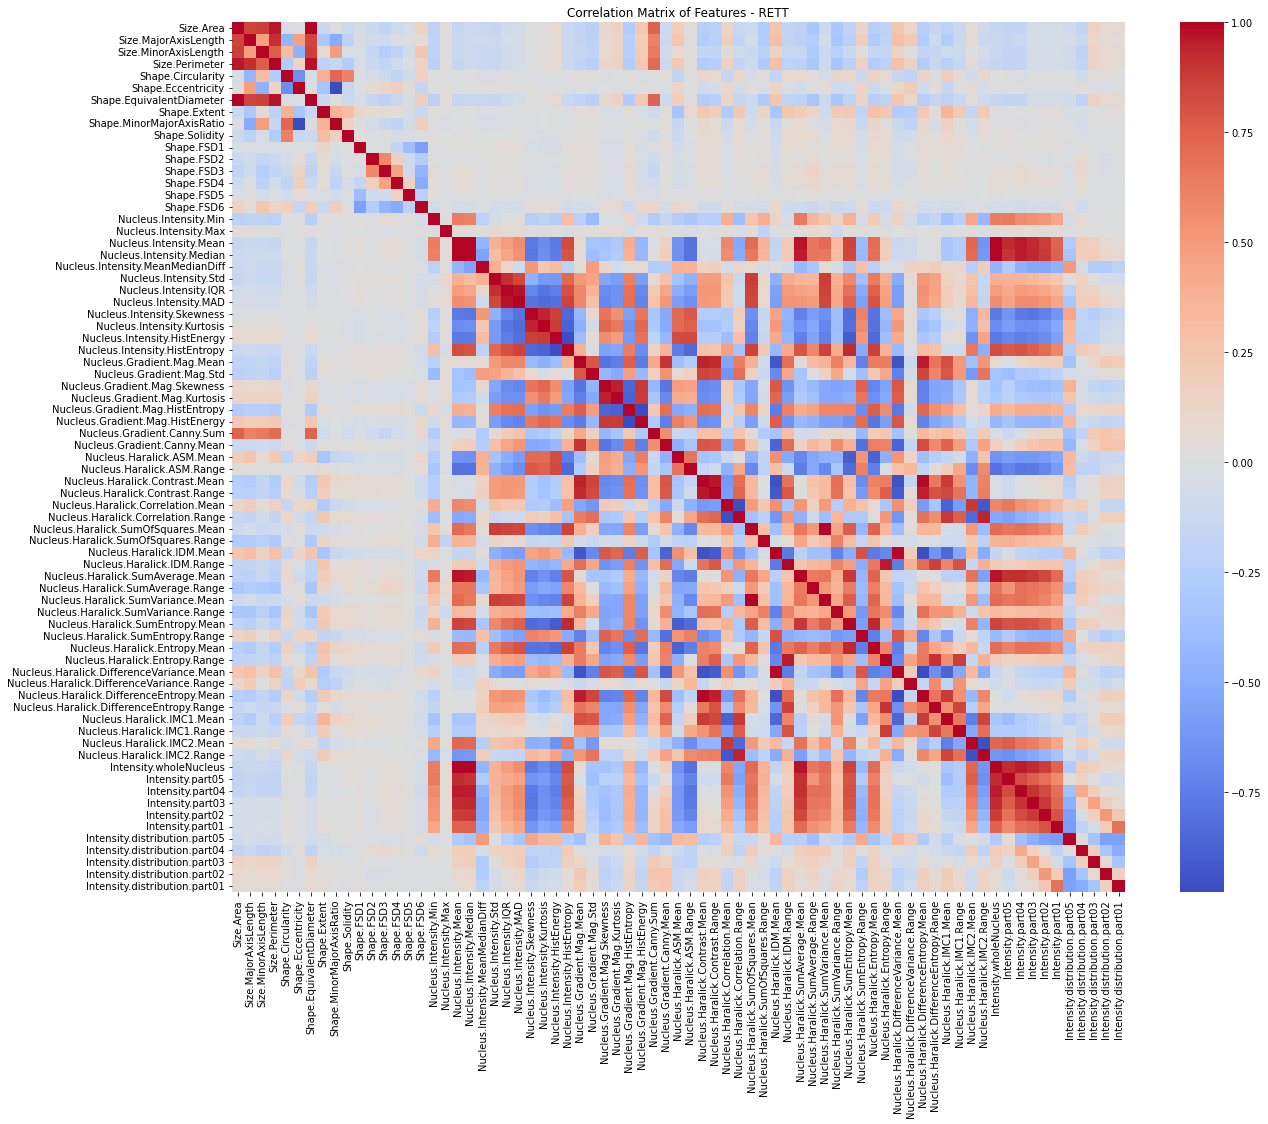

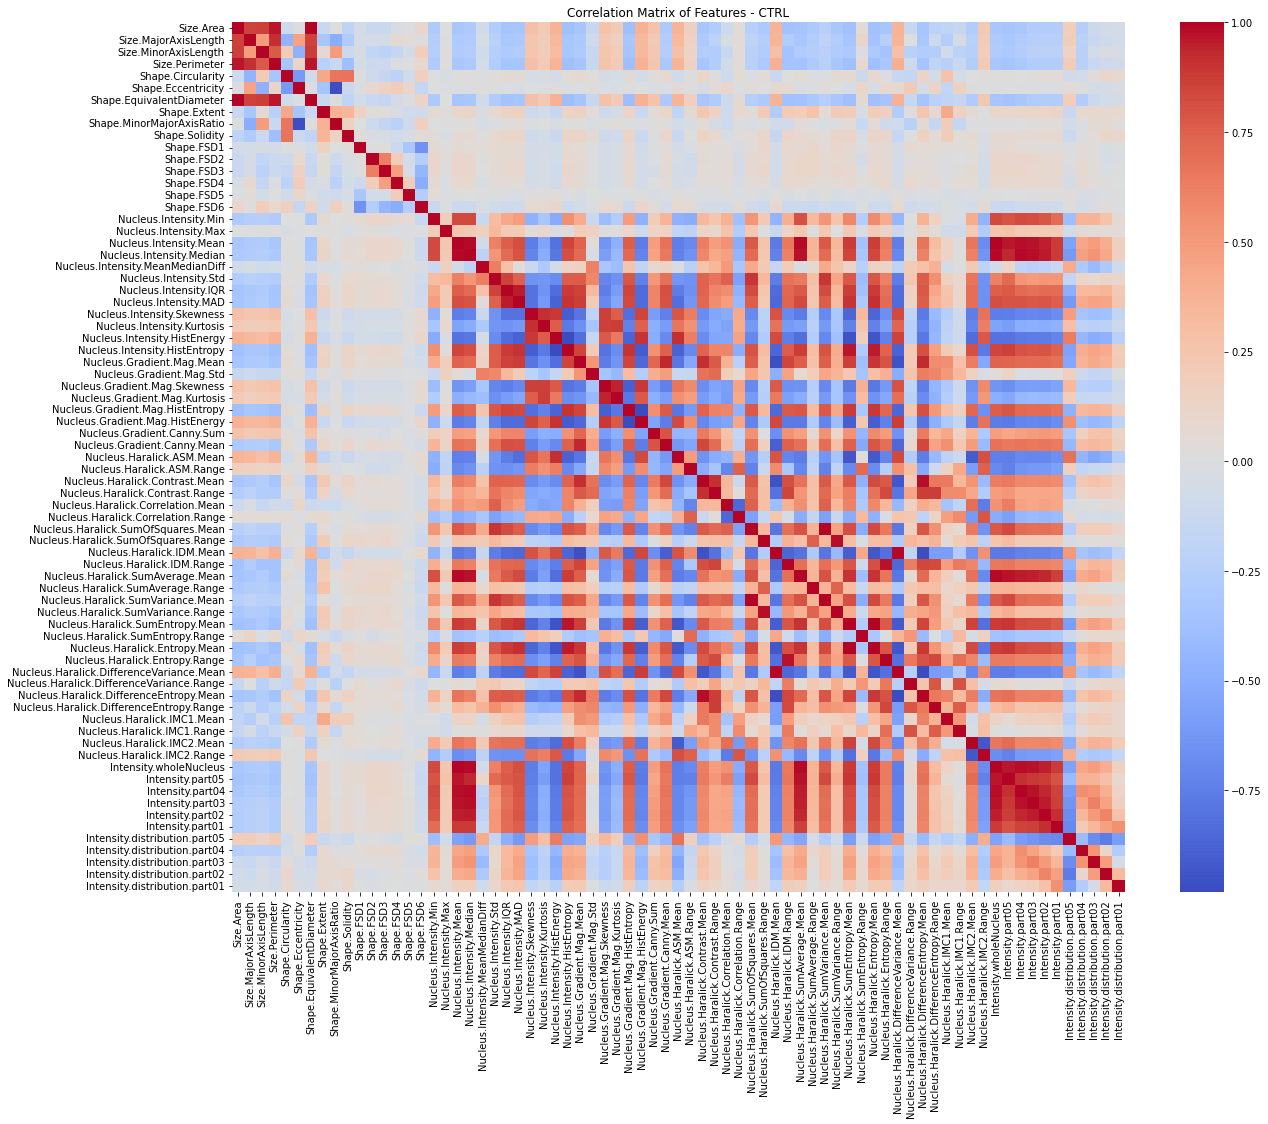

Size.Area  Size.MajorAxisLength  Size.MinorAxisLength  Size.Perimeter  \
0      0.116032              0.396522              0.066762        0.374163   
1      0.467174             -0.301901              1.192865        0.278903   
2     -0.811789             -1.182010             -0.306463       -0.985273   
3     -1.424928             -1.606535             -1.219630       -1.606290   
4      0.249571              0.683345             -0.220575        0.292251   
5      0.407179              0.505602              0.234649        0.425410   
6     -1.420203             -1.648085             -1.019131       -1.529907   
7      1.064178              0.800753              0.940642        0.848321   
8     -0.315341             -0.575813              0.034273       -0.361844   
9      1.615539              1.164923              1.760739        1.873872   
10     1.017109              0.314492              1.425008        0.778404   
11     0.559617              0.841294              0.180832        0.570566   
12    -0.944437             -1.069836             -0.460532       -0.802632   
13     0.615243             -0.218542              1.549635        0.519611   
14     0.767592              0.476878              0.893587        0.733185   
15     0.660529             -0.169628              1.436969        0.459133   
16     0.094013             -0.516887              0.759971       -0.065919   
17     0.576911              0.329619              0.630447        0.375515   
18    -1.018071             -0.992385             -0.930944       -1.097851   
19    -0.656588             -1.222891              0.083842       -0.839971   
20     0.375444              0.122420              0.606490        0.321857   
21    -0.111110             -0.495389              0.320036       -0.286958   
22    -0.841118              0.077225             -1.497480       -0.564421   
23     4.278121              3.668189              2.563115        3.724137   
24     2.496559              2.563912              1.550732        2.515264   
25     0.458081              0.735057              0.060227        0.446284   
26     0.831331              0.321724              1.226945        0.831649   
27     3.178696              1.547845              3.636733        2.798608   
28     0.780875              1.193631              0.439334        1.221543   
29     0.470383              0.901400              0.138533        0.654269   
30    -0.381486              0.189704             -0.764418        0.109257   
31    -0.629844              0.022003             -1.136001       -0.518289   
32     0.903360              1.594797              0.045763        1.041252   
33    -0.654181             -1.169098              0.050261       -0.827622   
34     1.013008              0.507730              1.202586        0.810421   
35     0.143667             -0.092389              0.487727        0.183582   
36     0.806905              0.234469              1.564812        1.002062   
37     0.076540              0.204253              0.000459        0.159444   
38     1.105273              0.843316              0.956019        0.925617   
39    -0.346987             -0.053728             -0.575936       -0.398537   
40     1.545204              0.866836              1.696771        1.245681   
41    -0.527506             -1.011915              0.144334       -0.674088   
42    -1.149292             -0.796652             -1.366368       -1.107496   
43    -0.536420             -0.484110             -0.312413       -0.417767   
44     0.382129              0.367650              0.385910        0.460338   
45    -0.832025             -0.705174             -0.750293       -0.794399   
46     0.658746              0.506382              0.643395        0.518966   
47    -0.343332             -0.918416              0.391789       -0.518995   
48    -0.713908             -0.170239             -1.118342       -0.636895   
49     0.194034              1.630275             -0.811

In [32]:
target = "features_ScoreCAM"
stain_type = "H3K27ac"
rett_type = "HPS9999"
savename = f"Feature_{rett_type}_{stain_type}"
loadpath_RETT = f"tables/{target}/features_{rett_type}_RETT_{stain_type}.csv"

df_combined, df_RETT, df_CTRL = loadcsv_Standard(target, stain_type, rett_type)

features = df_CTRL.columns.tolist()
for i in range(len(features)):
    print(i, features[i])
print("len(features): ", len(features))

correlation_matrix(df_RETT.drop(columns=['State']), "RETT", savename)
correlation_matrix(df_CTRL.drop(columns=['State']), "CTRL", savename)
df_combined

# Variances

In [58]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
pd.set_option('display.max_rows', None)

def loadcsv_only(target, stain_type, rett_type):
    loadpath_RETT = f"tables/{target}/features_{rett_type}_RETT_{stain_type}_Resnet10_noavg_ScoreCAM.csv"
    loadpath_CTRL = f"tables/{target}/features_{rett_type}_CTRL_{stain_type}_Resnet10_noavg_ScoreCAM.csv"

    columns_to_use = [10] + list(range(12, 19)) + list(range(20, 22)) + list(range(36, 99))
    # 读取 CSV 文件时仅加载指定的列
    df_RETT = pd.read_csv(loadpath_RETT, usecols=columns_to_use).dropna()  # 删除包含 NaN 的样本
    df_CTRL = pd.read_csv(loadpath_CTRL, usecols=columns_to_use).dropna()  # 删除包含 NaN 的样本

    # 检查数据形状
    print(f"RETT shape: {df_RETT.shape}")
    print(f"CTRL shape: {df_CTRL.shape}")
    return df_RETT, df_CTRL

In [54]:
target = "features_ScoreCAM"
rett_type = "HPS9999"
stain_type = "H3K27ac"
df_RETT, df_CTRL = loadcsv_only(target, stain_type, rett_type)

# normalized
df_RETT_normalized = df_RETT/df_RETT.mean(numeric_only=True)
df_CTRL_normalized = df_CTRL/df_CTRL.mean(numeric_only=True)

RETT 数据形状: (3486, 73)
CTRL 数据形状: (1567, 73)


In [38]:
# 计算每个特征的方差, 从小到大的排序
variances = df_RETT_normalized.var(numeric_only=True)
sorted_variances = variances.sort_values()
# print(sorted_variances)

In [39]:
variances = df_CTRL_normalized.var(numeric_only=True)
sorted_variances = variances.sort_values()
# print(sorted_variances)

***

***

# Feature ScoreCAM

In [56]:
def validate_ttest(df_RETT, df_CTRL, side):
    # 确保两组数据的特征列名称一致
    assert (df_RETT.columns == df_CTRL.columns).all(), "两组数据的特征列名称不一致"
    
    # 计算独立样本 t 检验，使用 Welch's t 检验
    t_values, p_values = ttest_ind(df_CTRL, df_RETT, equal_var=False)  # 可以假设不等方差
    
    if side == "oneside":
        # 单边检验：假设组1（RETT）的均值大于组2（CTRL）
        p_values = p_values / 2
        # 如果 t 值为负，则取 1 - (p 值 / 2)
        p_values = np.where(t_values < 0, 1 - p_values, p_values)
    elif side == "twoside":
        # 双边检验不需要进一步调整 p 值
        pass
    else:
        raise ValueError("side 参数必须是 'oneside' 或 'twoside'")
        
#     # 进行校正
#     rej, p_values = smm.multipletests(p_values, alpha=1e-100, method='fdr_bh')[:2]
    
    # 创建结果数据框
    results = pd.DataFrame({
        'feature': df_RETT.columns,
        't_value': t_values,
        'p_value': p_values
    })

    # 仅保留 p 值小于 0.01 的特征
    results = results[results['p_value'] < 1e-100]
    
    if side == "oneside":
        # 对 t 值进行从大到小排序
        sorted_filtered_results = results.reindex(results['t_value'].sort_values(ascending=False).index)
    elif side == "twoside":
        # 对 t 值的绝对值进行从大到小排序
        sorted_filtered_results = results.reindex(results['t_value'].abs().sort_values(ascending=False).index)

    # 对 p 值进行从小到大的排序
#     sorted_filtered_results = results.sort_values(by='p_value')

    # 设置显示选项以显示完整结果
    pd.set_option('display.max_rows', None)

    # 输出排序后的结果
    print("按 p 值排序且 p 值小于 1e-100 的特征：", len(sorted_filtered_results))
    print(sorted_filtered_results)
    print("-----------------------------------------------------------------------\n")
    
    return sorted_filtered_results

RETT shape: (3486, 73)
CTRL shape: (1567, 73)
Intensity    23
Haralick     26
Gradient      8
Size          4
Shape        12
Name: category, dtype: int64


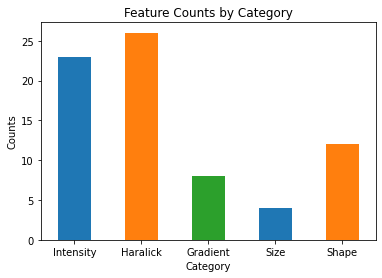

In [59]:
df_RETT, df_CTRL = loadcsv_only(target, stain_type, rett_type)
features = df_CTRL.columns.tolist()
histgram_categories(features, stain_type)

👑 features_ScoreCAM - HPS9999 - All
RETT shape: (3554, 73)
CTRL shape: (1701, 73)
按 p 值排序且 p 值小于 1e-100 的特征： 31
                                feature    t_value        p_value
66                     Intensity.part02  79.131120   0.000000e+00
19             Nucleus.Intensity.Median  78.923915   0.000000e+00
65                     Intensity.part03  77.132042   0.000000e+00
18               Nucleus.Intensity.Mean  76.080665   0.000000e+00
62               Intensity.wholeNucleus  76.080641   0.000000e+00
64                     Intensity.part04  72.603739   0.000000e+00
46     Nucleus.Haralick.SumAverage.Mean  71.934703   0.000000e+00
50     Nucleus.Haralick.SumEntropy.Mean  70.781098   0.000000e+00
67                     Intensity.part01  70.291203   0.000000e+00
52        Nucleus.Haralick.Entropy.Mean  65.071698   0.000000e+00
27        Nucleus.Intensity.HistEntropy  64.125965   0.000000e+00
71        Intensity.distribution.part02  59.858834   0.000000e+00
47    Nucleus.Haralick.SumAver

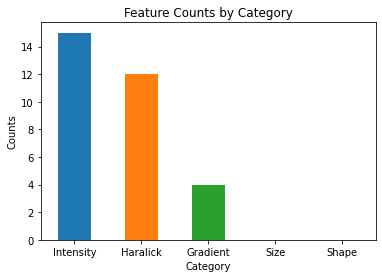

👑 features_ScoreCAM - HPS9999 - H3K27ac
RETT shape: (3486, 73)
CTRL shape: (1567, 73)
按 p 值排序且 p 值小于 1e-100 的特征： 14
                                     feature    t_value        p_value
44                 Nucleus.Haralick.IDM.Mean  83.609990   0.000000e+00
54  Nucleus.Haralick.DifferenceVariance.Mean  74.306817   0.000000e+00
51         Nucleus.Haralick.SumEntropy.Range  62.484727   0.000000e+00
30             Nucleus.Gradient.Mag.Skewness  48.023964  3.952525e-323
33           Nucleus.Gradient.Mag.HistEnergy  45.547851  8.226249e-298
24                Nucleus.Intensity.Skewness  43.181851  1.220143e-280
40         Nucleus.Haralick.Correlation.Mean  39.696003  2.848137e-291
26              Nucleus.Intensity.HistEnergy  38.151887  8.759939e-233
68             Intensity.distribution.part05  34.105198  7.091585e-199
36                 Nucleus.Haralick.ASM.Mean  33.753236  3.149815e-192
43       Nucleus.Haralick.SumOfSquares.Range  31.385697  1.589009e-172
37                Nucleus.Harali

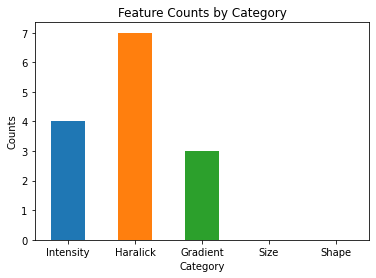

👑 features_ScoreCAM - HPS9999 - CTCF
RETT shape: (3518, 73)
CTRL shape: (1592, 73)
按 p 值排序且 p 值小于 1e-100 的特征： 19
                                feature    t_value        p_value
40    Nucleus.Haralick.Correlation.Mean  74.412877   0.000000e+00
60           Nucleus.Haralick.IMC2.Mean  53.939468   0.000000e+00
21                Nucleus.Intensity.Std  49.553919   0.000000e+00
27        Nucleus.Intensity.HistEntropy  47.168429   0.000000e+00
48    Nucleus.Haralick.SumVariance.Mean  43.650774   0.000000e+00
42   Nucleus.Haralick.SumOfSquares.Mean  43.430494   0.000000e+00
22                Nucleus.Intensity.IQR  42.208136  4.711685e-304
50     Nucleus.Haralick.SumEntropy.Mean  42.030029   0.000000e+00
23                Nucleus.Intensity.MAD  40.224229  2.859841e-283
63                     Intensity.part05  36.228400  9.532971e-245
46     Nucleus.Haralick.SumAverage.Mean  33.460897  1.492274e-214
52        Nucleus.Haralick.Entropy.Mean  30.518064  5.514487e-187
32     Nucleus.Gradient.Mag.H

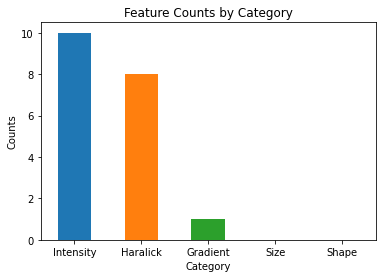

👑 features_ScoreCAM - HPS9999 - Dapi
RETT shape: (3484, 73)
CTRL shape: (1517, 73)
按 p 值排序且 p 值小于 1e-100 的特征： 25
                               feature    t_value        p_value
66                    Intensity.part02  59.830179   0.000000e+00
67                    Intensity.part01  56.899685   0.000000e+00
65                    Intensity.part03  55.991615   0.000000e+00
19            Nucleus.Intensity.Median  52.897059   0.000000e+00
64                    Intensity.part04  52.571631   0.000000e+00
18              Nucleus.Intensity.Mean  51.948858   0.000000e+00
62              Intensity.wholeNucleus  51.948855   0.000000e+00
46    Nucleus.Haralick.SumAverage.Mean  47.017839   0.000000e+00
50    Nucleus.Haralick.SumEntropy.Mean  42.525764   0.000000e+00
71       Intensity.distribution.part02  41.307659   0.000000e+00
63                    Intensity.part05  40.349650  8.679837e-278
27       Nucleus.Intensity.HistEntropy  39.763587  1.024600e-297
52       Nucleus.Haralick.Entropy.Mean  39

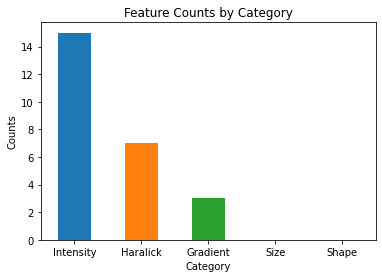

In [60]:
target = "features_ScoreCAM"
rett_type = "HPS9999"

# One side
for stain_type in ["All", "H3K27ac", "CTCF", "Dapi"]:
    print(f"👑 {target} - {rett_type} - {stain_type}")
    df_RETT, df_CTRL = loadcsv_only(target, stain_type, rett_type)
    results = validate_ttest(df_RETT, df_CTRL, "oneside")
    histgram_categories(results["feature"], stain_type)

👑 features_ScoreCAM - HPS9999 - All
RETT shape: (3554, 73)
CTRL shape: (1701, 73)
按 p 值排序且 p 值小于 1e-100 的特征： 47
                                     feature    t_value        p_value
66                          Intensity.part02  79.131120   0.000000e+00
19                  Nucleus.Intensity.Median  78.923915   0.000000e+00
65                          Intensity.part03  77.132042   0.000000e+00
18                    Nucleus.Intensity.Mean  76.080665   0.000000e+00
62                    Intensity.wholeNucleus  76.080641   0.000000e+00
64                          Intensity.part04  72.603739   0.000000e+00
46          Nucleus.Haralick.SumAverage.Mean  71.934703   0.000000e+00
50          Nucleus.Haralick.SumEntropy.Mean  70.781098   0.000000e+00
67                          Intensity.part01  70.291203   0.000000e+00
24                Nucleus.Intensity.Skewness -67.105330   0.000000e+00
52             Nucleus.Haralick.Entropy.Mean  65.071698   0.000000e+00
68             Intensity.distributio

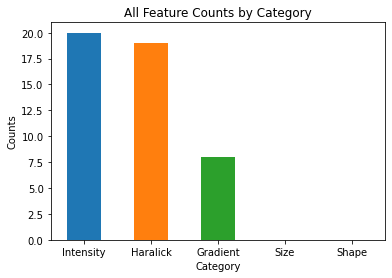

👑 features_ScoreCAM - HPS9999 - H3K27ac
RETT shape: (3486, 73)
CTRL shape: (1567, 73)
按 p 值排序且 p 值小于 1e-100 的特征： 46
                                     feature     t_value        p_value
35               Nucleus.Gradient.Canny.Mean -108.929256   0.000000e+00
28                 Nucleus.Gradient.Mag.Mean -105.641391   0.000000e+00
34                Nucleus.Gradient.Canny.Sum  -85.686292   0.000000e+00
38            Nucleus.Haralick.Contrast.Mean  -84.205808   0.000000e+00
29                  Nucleus.Gradient.Mag.Std  -83.954381   0.000000e+00
44                 Nucleus.Haralick.IDM.Mean   83.609990   0.000000e+00
56   Nucleus.Haralick.DifferenceEntropy.Mean  -82.056930   0.000000e+00
58                Nucleus.Haralick.IMC1.Mean  -81.174430   0.000000e+00
54  Nucleus.Haralick.DifferenceVariance.Mean   74.306817   0.000000e+00
39           Nucleus.Haralick.Contrast.Range  -71.460109   0.000000e+00
51         Nucleus.Haralick.SumEntropy.Range   62.484727   0.000000e+00
23                  

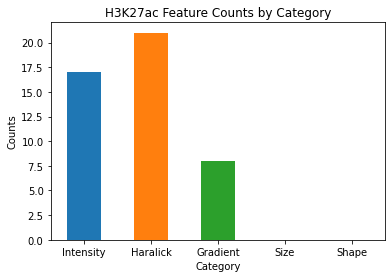

👑 features_ScoreCAM - HPS9999 - CTCF
RETT shape: (3518, 73)
CTRL shape: (1592, 73)
按 p 值排序且 p 值小于 1e-100 的特征： 31
                                feature    t_value        p_value
40    Nucleus.Haralick.Correlation.Mean  74.412877   0.000000e+00
41   Nucleus.Haralick.Correlation.Range -67.775634   0.000000e+00
61          Nucleus.Haralick.IMC2.Range -55.956724   0.000000e+00
60           Nucleus.Haralick.IMC2.Mean  53.939468   0.000000e+00
21                Nucleus.Intensity.Std  49.553919   0.000000e+00
27        Nucleus.Intensity.HistEntropy  47.168429   0.000000e+00
48    Nucleus.Haralick.SumVariance.Mean  43.650774   0.000000e+00
42   Nucleus.Haralick.SumOfSquares.Mean  43.430494   0.000000e+00
22                Nucleus.Intensity.IQR  42.208136  9.423371e-304
50     Nucleus.Haralick.SumEntropy.Mean  42.030029   0.000000e+00
26         Nucleus.Intensity.HistEnergy -40.979051   0.000000e+00
23                Nucleus.Intensity.MAD  40.224229  5.719682e-283
58           Nucleus.Haralick

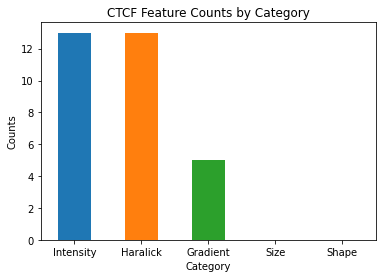

👑 features_ScoreCAM - HPS9999 - Dapi
RETT shape: (3484, 73)
CTRL shape: (1517, 73)
按 p 值排序且 p 值小于 1e-100 的特征： 39
                                     feature    t_value        p_value
66                          Intensity.part02  59.830179   0.000000e+00
67                          Intensity.part01  56.899685   0.000000e+00
65                          Intensity.part03  55.991615   0.000000e+00
19                  Nucleus.Intensity.Median  52.897059   0.000000e+00
64                          Intensity.part04  52.571631   0.000000e+00
18                    Nucleus.Intensity.Mean  51.948858   0.000000e+00
62                    Intensity.wholeNucleus  51.948855   0.000000e+00
46          Nucleus.Haralick.SumAverage.Mean  47.017839   0.000000e+00
68             Intensity.distribution.part05 -45.637453   0.000000e+00
50          Nucleus.Haralick.SumEntropy.Mean  42.525764   0.000000e+00
24                Nucleus.Intensity.Skewness -42.115341   0.000000e+00
71             Intensity.distributi

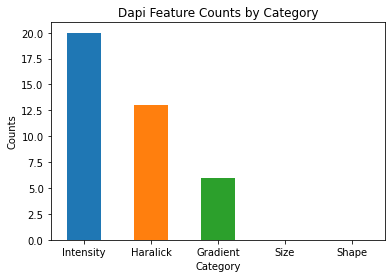

In [63]:
# Two side
for stain_type in ["All", "H3K27ac", "CTCF", "Dapi"]:
    print(f"👑 {target} - {rett_type} - {stain_type}")
    df_RETT, df_CTRL = loadcsv_only(target, stain_type, rett_type)
    results = validate_ttest(df_RETT, df_CTRL, "twoside")
    histgram_categories(results["feature"], stain_type)

In [62]:
# 定义分类关键词
categories = {
    'Nucleus.Intensity': 'Intensity',
    'Intensity': 'Intensity',
    'Nucleus.Haralick': 'Haralick',
    'Nucleus.Gradient': 'Gradient',
    'Size': 'Size',
    'Shape': 'Shape'
}

# 定义函数来分类特征
def classify_feature(feature):
    for category in categories:
        if category in feature:
            return categories[category]
    return 'Other'

def histgram_categories(df_features, stain_type):
    df_features = pd.DataFrame({'feature': df_features})
    # 对每个特征进行分类
    df_features['category'] = df_features['feature'].apply(classify_feature)

    # 统计每个分类的特征数量
    category_counts = df_features['category'].value_counts()

    # 按固定顺序重新排序
    fixed_order = ['Intensity', 'Haralick', 'Gradient', 'Size', 'Shape']
    category_counts = category_counts.reindex(fixed_order)
    print(category_counts)
    
    # 设置颜色
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # 可根据需要调整颜色

    # 画直方图
    category_counts.plot(kind='bar', color=colors)
    plt.title(f'{stain_type} Feature Counts by Category')
    plt.xlabel('Category')
    plt.ylabel('Counts')
    plt.xticks(rotation=0)  # 保持x轴标签水平显示
    plt.show()

In [51]:
# target = "features_ScoreCAM"
# for rett_type in ["HPS9999"]:
#     for stain_type in ["H3K27ac", "CTCF", "Dapi"]:
#         print(f"👑 {target} - {rett_type} - {stain_type}")
#         savename = f"Feature_{rett_type}_{stain_type}"

#         df_combined, df_RETT, df_CTRL = loadcsv(target, stain_type, rett_type)

#         significant_features_ttest = validate_ttest(df_combined, df_RETT, df_CTRL, target, savename)
#         print("significant_features_ttest: ", len(significant_features_ttest))
#         print(significant_features_ttest)
        
#         significant_features_utest = validate_mannwhitneyutest(df_combined, df_RETT, df_CTRL, target, savename)
#         print("significant_features_utest: ", len(significant_features_utest))
#         print(significant_features_utest)

In [52]:
# for rett_type in ["HPS9999"]:
#     for stain_type in ["H3K27ac", "CTCF", "Dapi"]:
#         print(f"🌑🌒🌓🌔🌕 {target} - {rett_type} - {stain_type}")
#         savename = f"Feature_{rett_type}_{stain_type}"
        
#         df_combined, df_RETT, df_CTRL = loadcsv_Standard(target, stain_type, rett_type)
        
#         validate_pca(df_combined, df_RETT, df_CTRL, target, savename)

# Feature image

In [3]:
# target = "features_image"
# for rett_type in ["HPS3042", "HPS3049", "HPS3084", "HPS9999"]:
#     for stain_type in ["H3K27ac", "CTCF", "Dapi"]:
#         print(f"🌑🌒🌓🌔🌕 {target} - {rett_type} - {stain_type}")
#         savename = f"Feature_{rett_type}_{stain_type}"

#         df_combined, df_RETT, df_CTRL = loadcsv(target, stain_type, rett_type)

#         validate_ttest(df_combined, df_RETT, df_CTRL, target, savename)
#         validate_mannwhitneyutest(df_combined, df_RETT, df_CTRL, target, savename)
        
#         significant_features_ttest = validate_ttest(df_combined, df_RETT, df_CTRL, target, savename)
#         significant_features_utest = validate_mannwhitneyutest(df_combined, df_RETT, df_CTRL, target, savename)
        
# #         # 打印 DataFrame
# #         print("significant_features_ttest: ", len(significant_features_ttest))
# #         print(significant_features_ttest)
# #         print("significant_features_utest: ", len(significant_features_utest))
# #         print(significant_features_utest)

In [4]:
# target = "features_image"
# for rett_type in ["HPS3042", "HPS3049", "HPS3084", "HPS9999"]:
#     for stain_type in ["H3K27ac", "CTCF", "Dapi"]:
#         print(f"🌑🌒🌓🌔🌕 {target} - {rett_type} - {stain_type}")
#         savename = f"Feature_{rett_type}_{stain_type}"

#         df_combined, df_RETT, df_CTRL = loadcsv_Standard(target, stain_type, rett_type)
        
#         validate_pca(df_combined, df_RETT, df_CTRL, target, savename)

***

***

# BOX 箱型图

## ScoreCAM Box plot

In [4]:
def validata_boxplot(data_all, target, rett_type, feature):
    # 假设 data_all 是之前整理好的 DataFrame
    unique_stains = data_all['Stain_Type'].unique()  # 获取所有染色类型
    p_values = []
    # 计算每种染色类型的 p 值
    for stain in unique_stains:
        group_ctrl = data_all[(data_all['State'] == 'CTRL') & (data_all['Stain_Type'] == stain)][feature]
        group_rett = data_all[(data_all['State'] == 'RETT') & (data_all['Stain_Type'] == stain)][feature]
        t_val, p_val = ttest_ind(group_ctrl, group_rett, equal_var=False)  # 可以假设不等方差
#         # 单边检验：假设组1（RETT）的均值大于组2（CTRL）
#         p_val = p_val / 2
#         # 如果 t 值为负，则取 1 - (p 值 / 2)
#         p_val = np.where(t_val < 0, 1 - p_val, p_val)
        p_values.append(p_val)
    for i in range(len(unique_stains)):
        print(f"p-value {unique_stains[i]}: {p_values[i]}")

    # 设置颜色
    palette_colors = {"CTRL": sns.color_palette(palette='bwr')[0], 
                      "RETT": sns.color_palette(palette='Pastel1')[0]}  # CTRL 使用绿色，RETT 使用紫色
    savepath = f'tables/{target}/{target}_{rett_type}_{feature}.png'
    # 绘制箱型图
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='Stain_Type', y=feature, hue='State', data=data_all, palette=palette_colors)
    plt.title(f'{feature} with Stains and Cell States')
    plt.ylabel(f'{feature}')
    plt.xlabel('Stain Type')
    plt.legend(title='Cell State')
#     plt.savefig(savepath, dpi=300)
    plt.show()
    print(f"Saved BOX plot to {savepath}")

🦠 LOAD tables/features_ScoreCAM/features_HPS9999_RETT_All_Resnet10_noavg_ScoreCAM.csv (3554, 73)
🧫 LOAD tables/features_ScoreCAM/features_HPS9999_CTRL_All_Resnet10_noavg_ScoreCAM.csv (1701, 73)
🦠 LOAD tables/features_ScoreCAM/features_HPS9999_RETT_H3K27ac_Resnet10_noavg_ScoreCAM.csv (3486, 73)
🧫 LOAD tables/features_ScoreCAM/features_HPS9999_CTRL_H3K27ac_Resnet10_noavg_ScoreCAM.csv (1567, 73)
🦠 LOAD tables/features_ScoreCAM/features_HPS9999_RETT_CTCF_Resnet10_noavg_ScoreCAM.csv (3518, 73)
🧫 LOAD tables/features_ScoreCAM/features_HPS9999_CTRL_CTCF_Resnet10_noavg_ScoreCAM.csv (1592, 73)
🦠 LOAD tables/features_ScoreCAM/features_HPS9999_RETT_Dapi_Resnet10_noavg_ScoreCAM.csv (3484, 73)
🧫 LOAD tables/features_ScoreCAM/features_HPS9999_CTRL_Dapi_Resnet10_noavg_ScoreCAM.csv (1517, 73)
['Intensity.wholeNucleus', 'Intensity.distribution.part05']
💠 Fearure - HPS9999 - Intensity.wholeNucleus
p-value All: 0.0
p-value H3K27ac: 1.7967603893463204e-154
p-value CTCF: 2.86893073226408e-162
p-value Dapi:

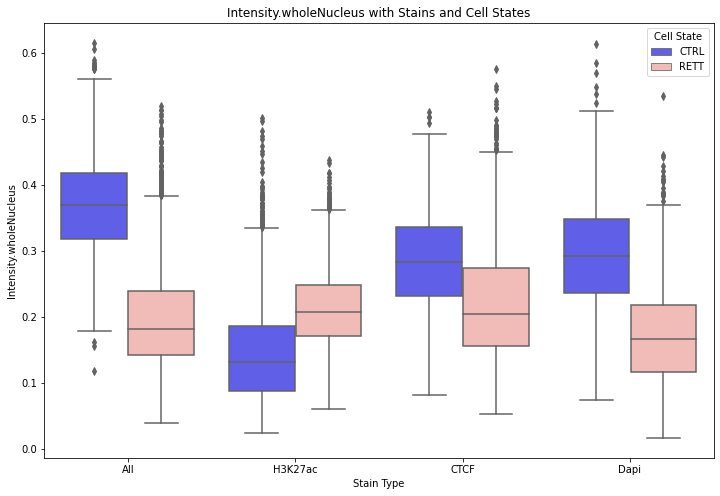

Saved BOX plot to tables/features_ScoreCAM/features_ScoreCAM_HPS9999_Intensity.wholeNucleus.png
💠 Fearure - HPS9999 - Intensity.distribution.part05
p-value All: 0.0
p-value H3K27ac: 1.4183170801418335e-198
p-value CTCF: 7.484621520081269e-19
p-value Dapi: 0.0


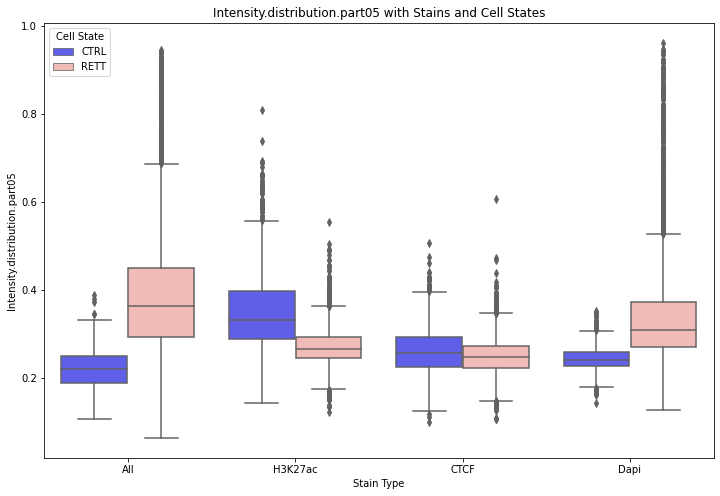

Saved BOX plot to tables/features_ScoreCAM/features_ScoreCAM_HPS9999_Intensity.distribution.part05.png


In [5]:
# 创建一个空的 DataFrame 用于存放所有数据
data_all = pd.DataFrame()

target = "features_ScoreCAM"
for rett_type in ["HPS9999"]:
    for stain_type in ["All", "H3K27ac", "CTCF", "Dapi"]:
        # 假设 loadcsv 函数返回的 df_combined 已包含状态标签
        df_combined, df_RETT, df_CTRL = loadcsv(target, stain_type, rett_type)
        df_combined['Stain_Type'] = stain_type  # 添加染色类型列
        data_all = pd.concat([data_all, df_combined])  # 合并数据

    features = ["Intensity.wholeNucleus", "Intensity.distribution.part05"]
    print(features)
    for feature in features:
        print(f"💠 Fearure - {rett_type} - {feature}")
        validata_boxplot(data_all, target, rett_type, feature)

# Image Box plot

In [10]:
# # 创建一个空的 DataFrame 用于存放所有数据
# data_all = pd.DataFrame()

# target = "features_image"
# for rett_type in ["HPS3042", "HPS3049", "HPS3084", "HPS9999"]:
#     for stain_type in ["H3K27ac", "CTCF", "Dapi"]:
#         # 假设 loadcsv 函数返回的 df_combined 已包含状态标签
#         df_combined, df_RETT, df_CTRL = loadcsv(target, stain_type, rett_type)
#         df_combined['Stain_Type'] = stain_type  # 添加染色类型列
#         data_all = pd.concat([data_all, df_combined])  # 合并数据

#     features = ["Intensity.wholeNucleus", "Intensity.distribution.part05"]
#     print(features)
#     for feature in features:
#         print(f"💠 Fearure - {rett_type} - {feature}")
#         validata_boxplot(data_all, target, rett_type, feature)